(Monday)

**Tasks**
Hint: use the file Data_Marketing_Customer_Analysis_Round3.csv

- Check if there are highly correlated features and drop them if there are any.
- One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint: check Dropfirst option). 
- For the first iteration, we will focus on the numericals data (numericals data frame) as our data source.

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd


df = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')

In [118]:
numeric = df.select_dtypes(include=np.number)
categoricals = df.select_dtypes(include=np.object)

/var/folders/q6/5m8hk7ms0p99xywmg31pkhym0000gn/T/ipykernel_4595/123256578.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = df.select_dtypes(include=np.object)


In [119]:
numeric.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707


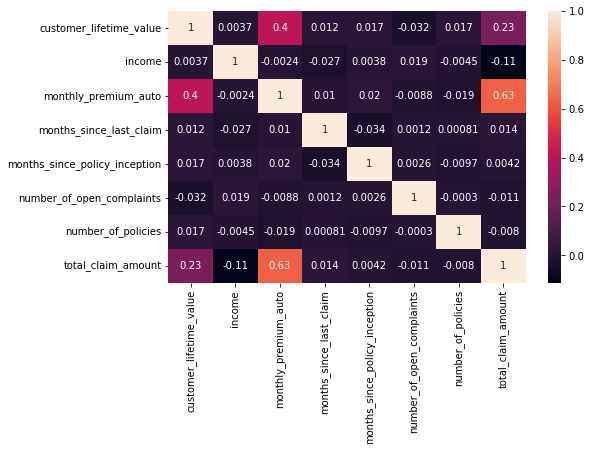

In [120]:
fig=plt.figure(figsize=(8,5))
sns.heatmap(numeric.corr(),annot=True)
plt.show()
#There're some correlated features like (monthly_premium_auto & total_claim_amount) and (total_claim_amount & CLV)

**One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint: check Dropfirst option).**

In [121]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

#function label encoder
def categoricals_encoding(x):
    categoricals[x] = label_encoder.fit_transform(categoricals[x])
    return categoricals

#function dummy

My valoration: 
- region (hot)
- response (label)
- coverage (label)
- education (label)
- employment (label)
- gender(hot)
- martial_status (label)
- poliy (label)
- renew offer tyoe (hot)
- sales channel (label)
- vehicle class(label)
- vehicle size (label)

- drop: 'effective_to_date', 'month'


In [122]:
#I'll create a list of the label columns 
categoricals.keys()

Index(['region', 'response', 'coverage', 'education', 'effective_to_date',
       'month', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [123]:
list_label_categoricals = ['response', 'coverage', 'education', 'employment_status', 'location_code',
       'marital_status', 'policy_type', 'policy', 'sales_channel', 'vehicle_class', 'vehicle_size']
list_hot_encoding = ['region','gender','renew_offer_type','renew_offer_type']
list_drop = ['effective_to_date', 'month']

In [124]:
df = df.drop(['effective_to_date', 'month'], axis=1)

In [125]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

#function label encoder 
education1 = {'high school':1, 'master':2}

def label_encoding(x):
    df[x] = label_encoder.fit_transform(df[x])
    return df

In [126]:
#function dummy (hot encoder)
df = pd.get_dummies(df, columns = ['region','gender','renew_offer_type','renew_offer_type'])

In [127]:
for i in list_label_categoricals:
    label_encoding(i)

df.info()

(Tuesday)

**Linear Regression**

- X-y split (y is the target variable, which is the total claim amount)
- Train-test split.
- Standardize the data (after the data split).
- Apply linear regression.
- Model Interpretation.


**X-Y split (y is the target variable, which is the total claim amount)**

In [128]:
numeric = numeric.select_dtypes(include=np.number)


x=numeric.drop('total_claim_amount', axis=1)
y=numeric.total_claim_amount 

In [129]:
numeric

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


**Train-test split.**

In [130]:
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=.30,random_state=42)

**Standardize the data (after the data split).**

In [131]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [132]:
X_test_scaled=std_scaler.transform(X_test)
X_train.shape

(7482, 7)

In [133]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[ 0.09537036 -0.38616002 -0.2975471  ...  1.49683921  0.68183709
  -0.41232904]
 [-0.55139048 -1.59933399  0.45573807 ... -0.5121996  -0.41999987
  -0.82917079]
 [-0.82084995 -1.28788435 -0.87699722 ...  1.71209337 -0.41999987
  -0.82917079]
 ...
 [-0.54732098 -1.28909716 -0.84802472 ... -1.44496762  3.98734797
   2.08872151]
 [ 0.71713282  1.02437858  0.36882055 ...  1.49683921 -0.41999987
  -0.41232904]
 [-0.15403225  0.47238827  0.19498551 ...  0.20531426 -0.41999987
   1.67187975]]
--------
[[-0.45575708  0.84601464 -0.93494224 ...  1.06633089 -0.41999987
   0.83819624]
 [ 0.17821389 -0.36873598  0.6295731  ...  1.06633089 -0.41999987
   0.00451272]
 [-0.69818339  0.67306792 -0.38446462 ... -0.11756698 -0.41999987
  -0.82917079]
 ...
 [-0.77724809 -1.22995245 -0.64521717 ...  0.27706565 -0.41999987
  -0.82917079]
 [-0.48438897 -0.6424268   0.71649062 ...  0.06181149  0.68183709
  -0.82917079]
 [ 2.08099884  1.92108996 -0.67418968 ... -0.76332945 -0.41999987
  -0.41232904]]


**Apply linear regression.**

In [134]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant (intercept)

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant (intercept)
predictions_test = model.predict(X_test_const_scaled) 


print_model = model.summary()

print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     738.0
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:09:09   Log-Likelihood:                -51177.
No. Observations:                7482   AIC:                         1.024e+05
Df Residuals:                    7474   BIC:                         1.024e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.3067      2.615    165.674      0.0

In [135]:
predictions_train

array([385.00540349, 573.79444239, 309.77470214, ..., 342.05493619,
       456.68569402, 457.05786385])

In [136]:
predictions_test

array([227.77325245, 557.51126627, 337.04484372, ..., 356.74506197,
       588.82009904, 230.30402597])

**Model Interpretation.**

In [137]:
# y = 
#433.0597 
#-6.5986*customer_lifetime_value 
#-33.1813*income 
#+187.8019*monthly_premium_auto 
#+1.9060*months_since_last_claim 
#-0.9115*months_since_policy_inception
#+1.7171*number_of_open_complaints
#-2.3202*number_of_policies

In [138]:
x.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809,48029,61,7,52,0,9
1,2228,92260,64,3,26,0,1
2,14947,22139,100,34,31,0,2
3,22332,49078,97,10,3,0,2
4,9025,23675,117,33,31,0,7


**Modelling**

In [149]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [150]:
y_test

3487      120
668       660
10315     244
5332       86
1523     1032
         ... 
5928      406
3706      321
7735       45
9320      597
7924       48
Name: total_claim_amount, Length: 3207, dtype: int64

In [151]:
y_train

10237    398
2689     489
4489     352
10401    491
749      640
        ... 
5734      79
5191       3
5390     460
860      468
7270     925
Name: total_claim_amount, Length: 7482, dtype: int64

**Making prediction**

In [152]:
y_pred=model.predict(X_test_scaled)


y_pred_train=model.predict(X_train_scaled)

In [153]:
print(y_pred)
print("---")
print(y_pred_train)

[227.77325245 557.51126627 337.04484372 ... 356.74506197 588.82009904
 230.30402597]
---
[385.00540349 573.79444239 309.77470214 ... 342.05493619 456.68569402
 457.05786385]


(Wednesday)

**Model Validation**
- Model Evaluation:
MSE (Mean Square Error)
RMSE (Root Mean Square Error)
MAE (Mean Absolute Error)
R2.
Adjusted R2.
-Feature Importance.

In [154]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

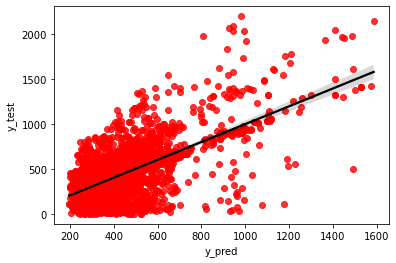

In [155]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

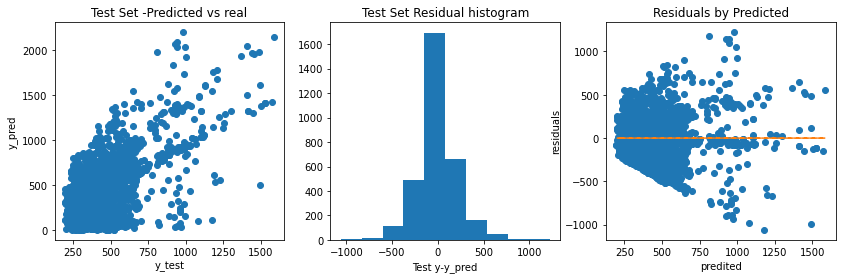

In [156]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")


ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [157]:
#the regression residuals follow a normal distribution. 

In [158]:
print(mse(y_test,y_pred))#Mean Square Error
print(mae(y_test,y_pred)) #Mean Absolute Error

49154.64390326823
152.83216224246732


In [159]:
##prediction on the train set, we see that the y_ped_train has a higher mse than y_test. We could be in a case of overfitting, however the difference is not that big so it's fine.R2=r2_score(y_test,y_pred)

mse(y_train,y_pred_train)

51125.07027313841

In [160]:
R2=r2_score(y_test,y_pred)
R2

0.4114006217055418

In [161]:
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)

In [162]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.4101126580768888

**Feature Importance.**

In [163]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [164]:
features_importances

,Attribute,Importance
2,monthly_premium_auto,187.285858
1,income,34.352649
0,customer_lifetime_value,6.042212
4,months_since_policy_inception,3.611510
6,number_of_policies,3.302638
3,months_since_last_claim,1.604738
5,number_of_open_complaints,1.541622


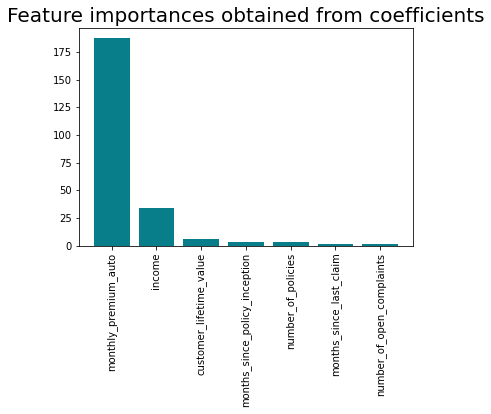

In [165]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [167]:
numeric.to_csv("Data/week4LAB.csv")